# DAT_SF_13 Midterm Homework 4

###About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute. The following link is for reference only; the spam dataset is included in our github repo, in the HW4 directory. _Be sure to use the dataset provided in our course github repo._

http://archive.ics.uci.edu/ml/datasets/Spambase

**Data Set Information:**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.

###Definitions of the attributes:

**48 continuous real [0,100] attributes of type word_freq_WORD**

= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

**6 continuous real [0,100] attributes of type char_freq_CHAR**

= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

**1 continuous real [1,...] attribute of type capital_run_length_average**

= average length of uninterrupted sequences of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_longest**

= length of longest uninterrupted sequence of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_total**

= sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

**1 nominal {0,1} class attribute of type spam**

= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other

In [8]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale, StandardScaler

In [9]:
X = spam_data.drop(['is_spam'], axis = 1)
y = spam_data.is_spam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

In [6]:
pca = PCA(n_components = 2, whiten = True)
X_pca = pca.fit_transform(X)

In [10]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_scaled)

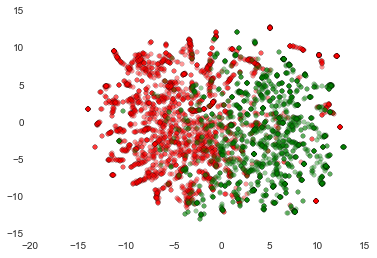

In [11]:
fig, ax = sns.plt.subplots(1,1, sharex=True, sharey=True)
for c, i, ax in (('r',0, ax),('g',1, ax)):
    ax.scatter(X_tsne[y.where(y == i).dropna().index, 0], X_tsne[y.where(y == i).dropna().index, 1], c = c, alpha = 0.4)

Cool! You can see how the two categoies really do separate into two fairly distinct groups by this technique. TSNE uses a combination of KNN, matrix decomposition, and optimization of distance between points in real space when changed to the transformed space.

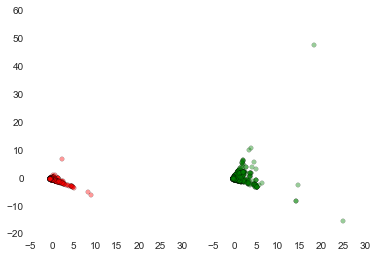

In [12]:
fig, ax = sns.plt.subplots(1,2, sharex=True, sharey=True)
for c, i, ax in (('r',0, ax[0]),('g',1, ax[1])):
    ax.scatter(X_pca[y.where(y == i).dropna().index, 0], X_pca[y.where(y == i).dropna().index, 1], c = c, alpha = 0.4)

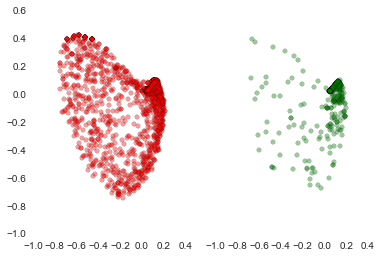

In [13]:
fig, ax = sns.plt.subplots(1,2, sharex=True, sharey=True)
for c, i, ax in (('r',0, ax[0]),('g',1, ax[1])):
    ax.scatter(X_kpca[y.where(y == i).dropna().index, 0], X_kpca[y.where(y == i).dropna().index, 1], c = c, alpha = 0.4)

In [14]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [15]:
clf = LogisticRegression(penalty = 'l1', class_weight='auto')
clf.fit(X_scaled, y)
to_drop = np.squeeze(abs(clf.coef_) == 0)
drop = X.columns[to_drop]
drop

Index([u'word_freq_857', u'word_freq_415', u'capital_run_length_average'], dtype='object')

The above features were removed from the model using the L1 norm, so they probably aren't very important.

###Exercise 2: Build a simple logistic regression and visualize it
use the variable "capital_run_length_longest" to predict "is_spam" How accurate is this single feature?

In [16]:
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold

0.730276026951


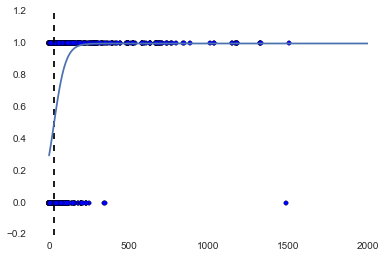

In [17]:
X_cap = X.capital_run_length_longest.values.reshape((len(X),1))
clf = LogisticRegression(class_weight='auto')
clf.fit(X_cap, y)
prob = clf.predict_proba(X_cap)
fig, ax = sns.plt.subplots()
ax.scatter(X_cap, y)
ax.plot(np.sort(X_cap.ravel()), prob[np.argsort(X_cap.ravel())][:,1])
ax.set_xlim(-100,2000)
v = clf.intercept_/-clf.coef_[0,0]
ax.vlines(v, ax.get_ylim()[0], ax.get_ylim()[1], linestyles = 'dashed')
ax.set_ylim(-.2,1.2)
print clf.score(X_cap, y)

###Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
clf = LogisticRegression(class_weight = 'auto')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print np.mean(pred == y_test)

0.926864590876


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 12)
clf = LogisticRegression(class_weight = 'auto')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print np.mean(pred == y_test)

0.926140477915


###Exercise 4: Apply cross validation to see how the model fares across different splits of your data
Use cross validation to score your model

In [22]:
clf = LogisticRegression()
cvs = cross_val_score(clf, X, y, cv = 5)
print 'unscaled X: ',np.mean(cvs)
cvs = cross_val_score(clf, X_scaled, y, cv = 5)
print 'scaled X: ',np.mean(cvs)

unscaled X:  0.912609537582
scaled X:  0.911088032949


###Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
Which model is more accurate?

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3, weights = 'distance')
cvs = cross_val_score(knn, X, y, cv = 5)
print 'unscaled X: ',np.mean(cvs)
cvs = cross_val_score(knn, X_scaled, y, cv = 5)
print 'scaled X: ',np.mean(cvs)

unscaled X:  0.788067093652
scaled X:  0.884126753458


Looks like logistic regression beats KNN with 3 neighbors. However, KNN is sensitive to scaling, so the scaled version gives better accuracy. Surprisingly, logistic regression is less sensitive to scaling than might be expected with the used of regularization parameters.

###Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [25]:
#clf = LogisticRegression(penalty = 'l2', class_weight='auto', random_state=0)
clf = SGDClassifier(loss = 'log', penalty = 'none', class_weight = 'auto', random_state=0, n_iter=500)
clf.fit(X_scaled, y)
co = clf.coef_[0]
clf = SGDClassifier(loss = 'log', penalty = 'none', class_weight = 'auto', random_state=0, n_iter=500)
print 'is_spam avg: ',np.mean(y == 1)
idvs = []
clf = SGDClassifier(loss = 'log', penalty = 'none', class_weight = 'auto', random_state=0, n_iter=500)
for c in X.columns:
    x = scaler.fit_transform(X[c].reshape((len(X),1)))
    clf.fit(x, y)
    pred = clf.predict(x)
    p = pred == y
    idvs.append(np.mean(p.map({True: 1, False:0})))
d = {'feature_name':X.columns, 'coefficient':co, 'single_pred_score':idvs} 
df = pd.DataFrame(d)
df.iloc[df.coefficient.order(ascending = False).index,:]


is_spam avg:  0.394044772875


,coefficient,feature_name,single_pred_score
3,168.518534,word_freq_3d,0.610302
55,2.544847,capital_run_length_longest,0.683764
52,1.451187,char_freq_$,0.747664
54,0.993710,capital_run_length_average,0.649424
22,0.965517,word_freq_000,0.710715
15,0.962849,word_freq_free,0.656596
6,0.952594,word_freq_remove,0.714193
53,0.897145,char_freq_#,0.606390
19,0.714732,word_freq_credit,0.642252
56,0.623598,capital_run_length_total,0.625299


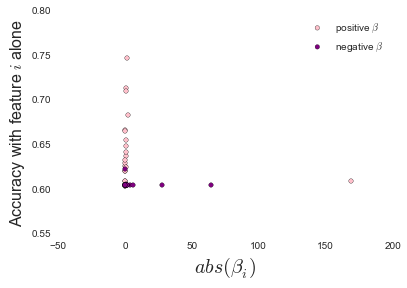

In [26]:
sns.plt.scatter(df.coefficient[df.coefficient >=0].abs(), df.single_pred_score[df.coefficient >=0], c = 'pink', label = r'positive $\beta$')
sns.plt.scatter(df.coefficient[df.coefficient <0].abs(), df.single_pred_score[df.coefficient <0], c = 'purple', label = r'negative $\beta$')
sns.plt.xlabel(r'$abs(\beta_i)$', size = 20)
sns.plt.ylabel('Accuracy with feature $i$ alone', size = 16)
sns.plt.legend()

This is a very confusing problem. If you scale the variable weights to center their means around 0 and standardize them to unit stds, you would think that the absolute values of the coefficients in the model would predict their relative importances. This does seem to be the general trend, but predicting the response based on individual features does not always give better accuracy when the coefficients to the model are larger in magnitude. I suspect this has something to do with the maximum liklihood estimates for the $\beta$ parameters when regularization is used. Since `LogisticRegression` does not include an option to estimate coefficients without penalties I tried using stochastic gradient descent, which does include that option in the `SGDClassifier` function with `loss='log'` and `penalty='none'`. Still, this doesn't capture expected result. There may also be issues with floating point arithmatic since even though all the variables have been scaled by mean and stds, the scaled mean is only *close* to 0, not exactly 0. In any case, it is difficult to clearly demarcate relative importances with the variables altogether. Looking at the predictive accuracy of only one variable at a time does show which variables are more important on their own. From this analysis, it looks as though `char_freq_$` is the best singe predictor, while `word_freq_3d` and `word_freq_george` have the largest magnitude coefficients in the full-variable model.

Determining the optimal value of `C`, the scaling parameter used for regularization is also important.

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size = .3, random_state = 12)
Cs = np.linspace(0.000001, 1.0, 500)
fprs = []
tprs = []
for c in Cs:
    clf = LogisticRegression(C=c, class_weight='auto')
    clf.fit(X_tr, y_tr)
    preds = clf.predict(X_te)
    cm = confusion_matrix(y_te, preds)
    tprs.append(cm[0,0]/(cm[1,0]+cm[0,0]))
    fprs.append(cm[0,1]/(cm[0,1]+cm[1,1]))
print np.argmax(tprs), np.argmin(fprs)
print Cs[np.argmax(tprs)]

197 212
0.394790184369


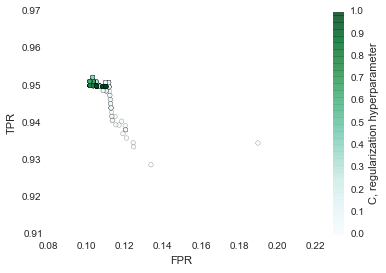

In [29]:
sns.plt.scatter(fprs, tprs, c = Cs, cmap = sns.plt.cm.BuGn, alpha = 0.6)
cbar = sns.plt.colorbar()
cbar.set_label('C, regularization hyperparameter')
sns.plt.xlabel('FPR')
sns.plt.ylabel('TPR')

###Exercise 7: Plot the ROC Curve for the logistic regression you chose¶

In [30]:
def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.1])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")
    return fpr, tpr, thresholds

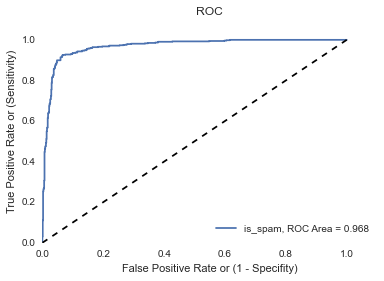

In [31]:
clf = LogisticRegression(C = 0.394790184369, class_weight='auto')
clf.fit(X_tr, y_tr)
preds = clf.predict_proba(X_te)
fpr, tpr, thr = plot_roc_curve(y_te, preds, 'is_spam')

0.500073502276


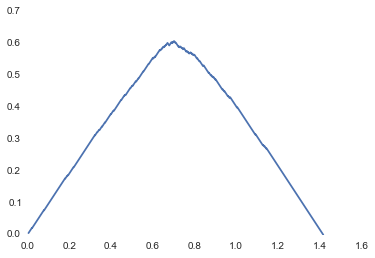

In [32]:
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]])
new_vs = []
for x,y in zip(fpr.ravel(), tpr.ravel()):
    v = np.array([x,y])
    v = v.T
    new_v = v.dot(rotation_matrix)
    new_vs.append(new_v)
new_fprs = [f[0] for f in new_vs]
new_tprs = [f[1] for f in new_vs]
sns.plt.plot(new_fprs, new_tprs)
print thr[np.argmax(new_tprs)]

If you rotate the ROC curve to more easily find its "apex" you see that the maximum TPR and minimum FPR occurs when the threshold is at .5, which makes sense since the logistic regression parameter estimation naturally sets the min and max at 0 and 1, leaving .5 as the natural, symetric mid-point.

###Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [33]:
thresholds = np.linspace(0,1,100)
clf = LogisticRegression(C = 0.42485, class_weight='auto')
clf.fit(X_tr, y_tr)
scores = []
for t in thresholds:
    preds = clf.predict_proba(X_te)
    preds = preds[:,1]
    cutoff = preds > t
    score = np.mean(cutoff == y_te)
    scores.append(score)

56
0.565656565657


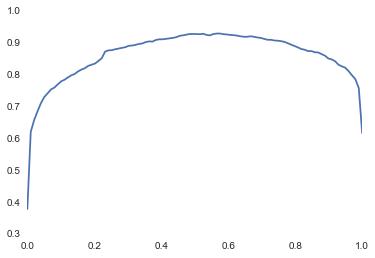

In [34]:
sns.plt.plot(thresholds, scores)
print np.argmax(scores)
print thresholds[np.argmax(scores)]

Interestingly, the optimum threshold for TPR and FPR is not the same as for predictive accuracy. Not entirely sure why this is, but in any case, it's not far from the optimum threshold from the ROC curve.

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea?

For a spam filter you want to catch as much spam as possible without discarding important emails. In this case, it might make more sense to increase the stringincy (raising the threshold) of the filter to ensure that few important emails get sent to the spam box. The inconvenience of a few spam messages in your inbox is less than the inconvenience of unexpectedly losing important messages.